# Duke History in the Rubenstein Library Card Catalog

Duke University has a long and storied history, especially in regards to the treatment of minority groups such as POC, women, and LQBTQ individuals. Duke has decades of changes in leadership, what the various colleges have been named, and in the traditions and goals of the university. We plan to dig deeper into what of Duke history is present in the card catalog files and see what that can tell us about the institution.

## Duke Presidential Last Names in the Card Catalog

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats
import numpy as np
pd.set_option('display.max_colwidth', None)

First we will be exploring the presidents of Duke University and their prevalence within the card catalog. The current President, Vincent Price, will be excluded since his last name is commonly found in the cards with another meaning and his time at Duke is well past the time of the catalog. Interestingly enough, the penultimate President's name appears in the cards (Richard Brodhead) despite his not coming to Duke until after the card catalog was digitized. Perhaps this eponymous figure was an ancestor of the one we know in relation to Duke today. We will be searching by last name, to see the frequency of the Presidents' last names in the catalog. A few of the presidents have surnames that have alternate meanings or uses (e.g., York, Wood) and we will attempt to remove the non-name occuraces of these. A disclamer to this analysis is that this method only captures names that were both properly spelled in the catloging process and translated into text accurately by our OCR software; it is likely that there are some misspelled names that did not make it thorugh the calculations.

Brantley York,
Braxton Craven,
W. T. Gannaway,
Marquis L. Wood,
John Franklin Crowell,
John C. Kilgo,
William Preston Few,
Robert L. Flowers,
A. Hollis Edens,
J. Deryl Hart,
Douglas M. Knight,
Terry Sanford,
H. Keith H. Brodie,
Nannerl O, Keohane,
Richard H. Brodhead 

In [6]:
# Read in dataset
df = pd.read_csv("added_author_identity.csv")

### Name Counting

In [5]:
# Duke University presidents in chronological order
presidents = {
    "York": 0,
    "Craven": 0,
    "Gannaway": 0,
    "Craven": 0,
    "Wood": 0,
    "Crowell": 0,
    "Kilgo": 0,
    "Few": 0,
    "Flowers": 0,
    "Edens": 0,
    "Hart": 0,
    "Knight": 0,
    "Sanford": 0,
    "Brodie": 0,
    "Keohane": 0,
    "Brodhead": 0,
}

# Check for occurances of presidental last names in the cards
for index, row in df.iterrows():
    for pres in presidents.keys():
        if pres in str(row['Text']):
            # Check for homonyms
            x = str(row['Text'])
            if pres == "York" and ("New" in x or "Yorktown" in x or "Yorkshire" in x or "England" in x or "Yorkville" in x or "in York" in x or "York Co" in x.title() or "of York" in x or "York City" in x or "York Dist" in x.title() or "Yorke" in x):
                continue
            elif pres == "Craven" and "Craven Co" in x.title():
                continue
            elif pres == "Wood" and (re.search(r"Wood[a-z-]", x) or "Wood County" in x):
                continue
            elif pres == "Kilgo" and re.search(r"Kilgo[a-z]", x):
                continue
            elif pres == "Hart" and re.search(r"Hart[a-z]", x):
                continue
            elif pres == "Knight" and (re.search(r"Knight[a-z]", x) or re.search(r"[a-z]Knight", x)):
                continue
            elif pres == "Sanford" and (re.search(r"Sanford,.*North Carolina", x) or "in Sanford" in x or "of Sanford" in x or "at Sanford" in x or "Railway" in x):
                continue
            else:
                presidents[pres] = presidents.get(pres) + 1

print(presidents)

{'York': 55, 'Craven': 97, 'Gannaway': 5, 'Wood': 192, 'Crowell': 10, 'Kilgo': 19, 'Few': 65, 'Flowers': 87, 'Edens': 3, 'Hart': 139, 'Knight': 81, 'Sanford': 145, 'Brodie': 15, 'Keohane': 0, 'Brodhead': 5}


In [2]:
president_counts = {
    'York': 55, 
    'Craven': 97, 
    'Gannaway': 5, 
    'Wood': 192, 
    'Crowell': 10, 
    'Kilgo': 19, 
    'Few': 65, 
    'Flowers': 87, 
    'Edens': 3, 
    'Hart': 139, 
    'Knight': 81, 
    'Sanford': 145, 
    'Brodie': 15, 
    'Keohane': 0, 
    'Brodhead': 5
}

census_freqs = {
    'York': 0.019, 
    'Craven': 0.006, 
    'Gannaway': 0.001, 
    'Wood': 0.098, 
    'Crowell': 0.007, 
    'Kilgo': 0.001, 
    'Few': 0.001, 
    'Flowers': 0.028, 
    'Edens': 0.002, 
    'Hart': 0.054, 
    'Knight': 0.060, 
    'Sanford': 0.015, 
    'Brodie': 0.002, 
    'Keohane': 0.000, 
    'Brodhead': 0.000
}

### Frequency Plotting

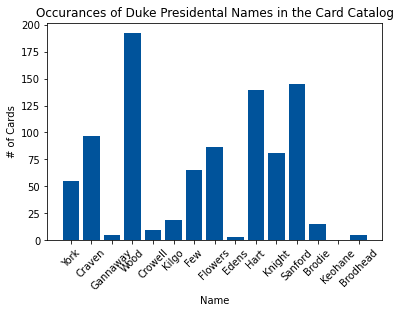

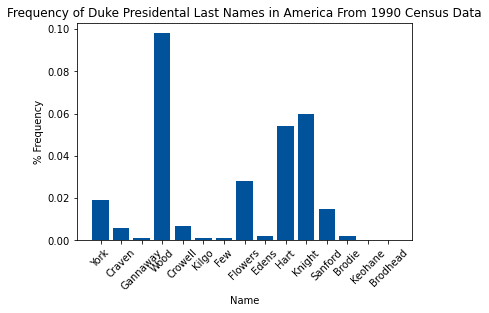

In [3]:
# Disply bar chart of last name occurances
plt.bar(*zip(*president_counts.items()), color='#00539B')
plt.xticks(rotation = 45)
plt.title("Occurances of Duke Presidental Names in the Card Catalog")
plt.xlabel("Name")
plt.ylabel("# of Cards")
plt.show()

# Display bar chart of last name frequencies based on the 1990 census data
plt.bar(*zip(*census_freqs.items()), color='#00539B')
plt.xticks(rotation = 45)
plt.title("Frequency of Duke Presidental Last Names in America From 1990 Census Data")
plt.xlabel("Name")
plt.ylabel("% Frequency")
plt.show()

The first bar chart shows the frequencies of the Duke presidential last names within the card catalog, in order of presidental appointment. There does not appear to be any trend over time amongst the names. When comparing to the 1990 census data of last name frequency in the United States, some names are similarly more frequent than others (e.g., Wood and Hart) or similarly infrequent (e.g. Gannaway, Edens, and Keohane). Some presidents, however, have statistically uncommon last names but a large amount of occurances in the card catalog (Craven, Few, Sanford). Are there other factors at play?

#### Occurances versus Time in Office

Each of these Presidents served varied time spans in office, let's see if there is a relationship between the length of time they spent in office and the amount of times they were mentioned in cards in the catalog. Preseident Craven served two nonconsecutive terms, so his time in office will be the addition of the two terms.

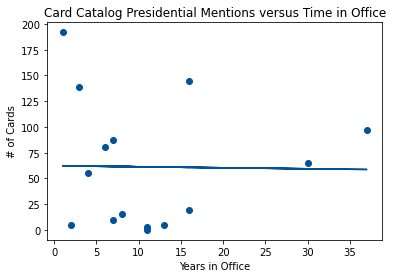

In [6]:
terms = [4, 37, 2, 1, 7, 16, 30, 7, 11, 3, 6, 16, 8, 11, 13]
counts = [55, 97, 5, 192, 10, 19, 65, 87, 3, 139, 81, 145, 15, 0, 5]

# Code adapted from https://www.w3schools.com/python/python_ml_linear_regression.asp
slope, intercept, r, p, std_err = stats.linregress(terms, counts)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, terms))
#------------------------------------------------------------------------

plt.scatter(terms, counts, color='#00539B')
plt.plot(terms, mymodel, color='#00539B')
plt.title("Card Catalog Presidential Mentions versus Time in Office")
plt.xlabel("Years in Office")
plt.ylabel("# of Cards")
plt.show()

Shown above is a scatterplot of the number of cards on which a presidential last name is mentioned versus the amount of time they spent in office. We ran a linear regression on the data and found **no correlation** between these two variables. Time in office appears not to impact the prevalence of presidential last names in the catalog. What else is going on here?

### Presidental First and Last Names

A common occurrance in the card catalog is the presence of multiple generations of family members. By looking at the *last* names of presidents, we were able to look for more general trends in regards to the presidents' names, but are unable to determine just how many of the last names gleaned are actually related to the president or their family members. Next we will look into instances where the specific presidents' *first and last* names occur in the files, with hopes of learning more about the history and prevalence of these figures within the card catalog.

In [8]:
df = pd.read_csv("added_author_identity.csv")
df = df[~df.Name.isnull()]
df = df[~df.Text.isnull()]
df=df.iloc[:,[2,3,8,9,10]]

# For example Craven, Braxton -- we can find if both words occur in a row
base = r'^{}'
expr = '(?=.*{})'

# names to look for occuring together
full_names = [
    ["York","Brantley"],
    ["Craven", "Braxton"],
    ["Gannaway", "William"],
    ["Wood", "Marquis"],
    ["Crowell", "John"],
    ["Kilgo", "John"],
    ["Few", "William"],
    ["Flowers", "Robert"],
    ["Edens", "Arthur"],
    ["Hart", "Julian"],
    ["Knight", "Douglas"],
    ["Sanford", "Terry"],
    ["Brodie", "Keith"],
    ["Keohane", "Nannerl"],
    ["Brodhead", "Richard"]
]

pres_first_last = ["Brantley York", "Braxton Craven", "William Gannaway", "Marquis Wood", "John Crowell",
                   "John Kilgo", "William Few", "Robert Flowers", "Arthur Edens", "Julian Hart",
                   "Douglas Knight", "Terry Sanford", "Keith Brodie", "Nannerl Keohane", "Richard Brodhead"]

# York was found 55 times according to the previous method, but most talk about cities & counties. There are probably very few talking about the president

In [11]:
# This better extracts the president names by checking the occurence of both last and first names
# Can be expanded to look if both names occur in nearby rows, and if either one occurs in adjacent rows, that also could be added
name_counts = []

for name in full_names:
    name_counts.append(len(df[df.Text.str.contains(base.format(''.join(expr.format(w) for w in name)),case=True)]))

print(name_counts)

[4, 36, 5, 5, 5, 10, 34, 15, 0, 1, 4, 17, 0, 0, 3]


When we check for both the first and last names of the Duke presidents, we get markedly fewer results, but more accurate ones. Let's take a look at the frequency of each president's mentions.

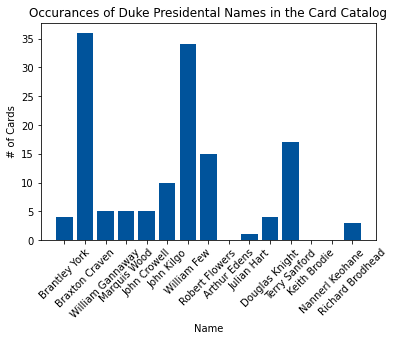

In [4]:
# Disply bar chart of first and last name occurances
plt.bar(pres_first_last, name_counts, color='#00539B')
plt.xticks(rotation = 45)
plt.title("Occurances of Duke Presidental Names in the Card Catalog")
plt.xlabel("Name")
plt.ylabel("# of Cards")
plt.show()

It looks like some of the presidents with more common last names, like Wood, Knight, and Hart, have gone down in frequency when we also check for first names. Let's compare with the length of time in office.

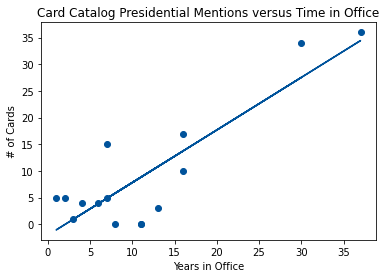

In [5]:
terms = [4, 37, 2, 1, 7, 16, 30, 7, 11, 3, 6, 16, 8, 11, 13]

# Code adapted from https://www.w3schools.com/python/python_ml_linear_regression.asp
slope, intercept, r, p, std_err = stats.linregress(terms, name_counts)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, terms))
#------------------------------------------------------------------------

plt.scatter(terms, name_counts, color='#00539B')
plt.plot(terms, mymodel, color='#00539B')
plt.title("Card Catalog Presidential Mentions versus Time in Office")
plt.xlabel("Years in Office")
plt.ylabel("# of Cards")
plt.show()

## TODO: Label dots with names

When we run a linear regression on first and last name occurrances versus years a president was in office, we find a **positive** correlation between the variables. So, as the number of years in office a president had increases, the number of cards on which they are mentioned increases.

## Qualitative Analysis of Duke Presidents in the Catalog

Let's see what the collections containing the Duke Presidents' full names are talking about and whether they are indeed mentioning the presidents. To do this, we searched through the instances where a president's first and last name appeared in the catalog, briefly summarized the mention, and provided relevant links.

### Keith Brodie, Nannerel Keohane, and Arthur Edens

Presidents Brodie, Keohane, and Edens were not mentioned in the card catalog.

### Julian Hart

The card containing "Julian" and "Hart" is not referring to the Duke president.

### Richard Brodhead

On two cards, a Richard Brodhead is mentioned, but not the one who was president of Duke. Upon further inspection, this man was a [U.S. Democratic Senator from Pennsylvania](https://en.wikipedia.org/wiki/Richard_Brodhead). The cards upon which he is mentioned can be viewed [here](https://archive.org/details/rubensteinmanuscriptcatalog_P_to_Peo/page/44/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Pep_to_Pn/page/n393/mode/2up).

### Douglas Knight

President Douglas Knight is mentioned as having [correspondence with Herbert Clarence Bradshaw](https://archive.org/details/rubensteinmanuscriptcatalog_R._Boyd_to_I._Brown/page/n125/mode/2up), being the recipient of a [letter from a Mr. Matton](https://archive.org/details/rubensteinmanuscriptcatalog_Mani_to_Maw/page/3/mode/2up) and [letters from William Murray Werber](https://archive.org/details/rubensteinmanuscriptcatalog_Ware_to_H._White/page/n567/mode/2up). The first two mention religion and all involve letters.

### Brantley York

One [card](https://archive.org/details/rubensteinmanuscriptcatalog_X_to_Z/page/n83/mode/2up) simply prompts a look to the Duke University Archives. York is mentioned here as [correspondent to Tod Robinson Caldwell](https://archive.org/details/rubensteinmanuscriptcatalog_M._Butler_to_Caq/page/n202/mode/2up). 

[This collection](https://archive.org/details/rubensteinmanuscriptcatalog_Durh_to_Els/page/n586/mode/2up) mentions early foundations of Duke Univesity and President Craven.

Here is [York's son's collection](https://archive.org/details/rubensteinmanuscriptcatalog_X_to_Z/page/n89/mode/2up).

### William Gannaway

Four cards mention William Gannaway Brownlow, former Governor of Tennesee and one is a prompt to [see the archives](https://archive.org/details/rubensteinmanuscriptcatalog_Fro_to_Geq/page/n322/mode/2up).

### Marquis Wood

Like many of the other presidents, Wood has a [card](https://archive.org/details/rubensteinmanuscriptcatalog_S._Williams_to_Wood/page/n717/mode/2up) prompting a check of the archives.

Marquis Wood also has two collections of [papers](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/59/mode/2up) associated with the Methodist Episcopal [Church](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/n344/mode/2up).

In William Clark Doub's [collection](https://archive.org/details/rubensteinmanuscriptcatalog_Del_to_Dov/page/19/mode/2up), Wood's manuscript on the introduction of Methodism into the Yadkin Valley is mentioned.

### John Crowell

We, of course, have the entry under Crowell's name to [See Duke University Archives](https://archive.org/details/rubensteinmanuscriptcatalog_Cre_to_I._Davis/page/n119/mode/2up).

This [card](https://archive.org/details/rubensteinmanuscriptcatalog_A_to_Amer/page/n127/mode/2up) mentions a quarrel between Crowell and his faculty.

[This](https://archive.org/details/rubensteinmanuscriptcatalog_Mus_to_Nn/page/n105/mode/2up) and [this](https://archive.org/details/rubensteinmanuscriptcatalog_Gri_to_Hand/page/n131/mode/2up) mention letters to and from John Crowell.

[Here](https://archive.org/details/rubensteinmanuscriptcatalog_V_to_Ward/page/n85/mode/2up) Crowell is part of a list of unpublished sketches of well-known North Carolinians.

### John Kilgo

Here we have the boilerplate John Kilgo [card](https://archive.org/details/rubensteinmanuscriptcatalog_K_to_Kira/page/n489/mode/2up).

Kilgo is listed as a correspondent in the Hemphill Family [Collection](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/23/mode/2up).

Kilgo appears to have been involved in the Methodist Episcopal Church [here](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/n503/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Mi_to_Mord/page/n686/mode/2up).

Correspondence with President Kilgo is mentioned [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/n668/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n642/mode/2up) in relation to the Southgates.

Kilgo seems to be something of a controversial and outspoken character, as [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Brown_to_L._Butler/page/n675/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/81/mode/2up) he is spoken of positively and [here](https://archive.org/details/rubensteinmanuscriptcatalog_A_to_Amer/page/n157/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n639/mode/2up) he is said to be involved in a court case.

### Robert Flowers

In addition to the requisite Flowers [card](https://archive.org/details/rubensteinmanuscriptcatalog_Fif_to_Frn/page/n276/mode/2up) we have correspondence between Flowers and others [here](https://archive.org/details/rubensteinmanuscriptcatalog_Conl_to_Crd/page/n265/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Gre_to_Grh/page/n605/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_No_to_Oz/page/151/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n632/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n638/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Thomas_to_Tom/page/n73/mode/2up).

President Flowers is praised [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/81/mode/2up) along with some other notable Dukies and had gifted some items related to the Methodist Church [here](https://archive.org/details/rubensteinmanuscriptcatalog_Meth_to_Mh/page/n17/mode/2up).

He is also in a [photograph](https://archive.org/details/rubensteinmanuscriptcatalog_Lowr_to_Mack/page/n115/mode/2up) that is cataloged and is said to have written a biography of [Edwin W. Fuller](https://archive.org/details/rubensteinmanuscriptcatalog_Fro_to_Geq/page/n95/mode/2up).

### Terry Sanford

As Terry Sanford was a US Senator and NC Governor as well as a President of Duke, there appear to be many cards mentioning him. Cards mentioning correspondence with Sanford can be found [here](https://archive.org/details/rubensteinmanuscriptcatalog_R._Boyd_to_I._Brown/page/n126/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Claw_to_Com/page/n498/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Claw_to_Com/page/n506/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Hold_to_Huba/page/n149/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Thomas_to_Tom/page/80/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ton_to_Tz/page/n177/mode/2up).

[This](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n580/mode/2up) talks about the Southern Rural Poverty Project, directed by members of the Sanford Institute of Public Policy.

[Here](https://archive.org/details/rubensteinmanuscriptcatalog_Claw_to_Com/page/n519/mode/2up) and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Hane_to_Harv/page/n9/mode/2up) are collections that catalog items that talk about Sanford.

[Here] and on subsequent pages we have a restricted collection relating to manuscripts created by Terry Sanford, related to his time as Governor and Duke President. And [here](https://archive.org/details/rubensteinmanuscriptcatalog_San_to_Sem/page/n73/mode/2up) there are documents related to his time as a US Senator.

### William Few

Few is mentioned as a professor [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Brown_to_L._Butler/page/1873/mode/2up).

He is included in collections with other important Duke figures [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ben_to_Blac/page/n481/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Dow_to_Durg/page/n255/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Fif_to_Frn/page/n292/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/21/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Pep_to_Pn/page/n47/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Wi._Smith_to_So/page/n641/mode/2up).

Correspondece with William Few is mentioned [here](https://archive.org/details/rubensteinmanuscriptcatalog_Lanp_to_Ler/page/n223/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_P_to_Peo/page/39/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_V_to_Ward/page/n403/mode/2up).

Few's son, Lynne Few, appears [here](https://archive.org/details/rubensteinmanuscriptcatalog_Ger_to_Gorl/page/n536/mode/2up).

He also has a [collection](https://archive.org/details/rubensteinmanuscriptcatalog_Elt_to_Fie/page/n625/mode/2up) of papers related to war and money.

Ella Howerton Parks remembers Few as the ["prince of all hat doffers."](https://archive.org/details/rubensteinmanuscriptcatalog_P_to_Peo/page/n295/mode/2up).

[This collection](https://archive.org/details/rubensteinmanuscriptcatalog_V_to_Ward/page/n649/mode/2up) talks about a treatise Few signed related to the relations between the northern and southern colonies.

### Braxton Craven

President Craven's great grandson has a rather extensive [collection](https://archive.org/details/rubensteinmanuscriptcatalog_Conl_to_Crd/page/n689/mode/2up) and his grandson is mentioned [here](https://archive.org/details/rubensteinmanuscriptcatalog_Conl_to_Crd/page/n677/mode/2up).

Braxton Craven is cataloged in the 1850 census of Randolph County [here](https://archive.org/details/rubensteinmanuscriptcatalog_Armi_to_Bal/page/n486/mode/2up) along with many transactions under his name. Another money-related [card](https://archive.org/details/rubensteinmanuscriptcatalog_Con_to_Conk/page/n403/mode/2up) mentions a statement for what Trinity College owed a company.

Correspondences involving Craven are cataloged [here](https://archive.org/details/rubensteinmanuscriptcatalog_Durh_to_Els/page/n586/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/n34/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/n88/mode/2up).

Craven is mentioned, but not in much detail [here](https://archive.org/details/rubensteinmanuscriptcatalog_Elt_to_Fie/page/n469/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Gri_to_Hand/page/n128/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Harw_to_Hem/page/167/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_J._Johnson_to_Jz/page/n676/mode/2up), [here](https://archive.org/details/rubensteinmanuscriptcatalog_Lanp_to_Ler/page/27/mode/2up), and [here](https://archive.org/details/rubensteinmanuscriptcatalog_I._White_to_R._Williams/page/n408/mode/2up).